<a href="https://colab.research.google.com/github/pu-bi/AI-industry-job-experience-for-non-majors/blob/main/2-preprocess/3_Inference_and_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 방금 만든 모델로 인퍼런스를 진행하기 위해 필요한 것을 다운받습니다.

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 5.5 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 36.3 MB/s 
     |████████████████████████████████| 163 kB 72.6 MB/s 


In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, AutoTokenizer
import numpy as np
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
id2label = {0: '날씨 묻기', 1: '관광지 추천', 2: '숙소 추천', 3: '맛집 추천', 4: '인사', 5: '소개', 6: '기타'}

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이전 파일에서 저장했던 모델을 불러옵니다.

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/week2/REALLLLwk2/finetuning/my_model', local_files_only=True)
trainer = Trainer(model=model)

# Inference

모델에 새로운 문장을 넣어 잘 작동하는지 확인합니다.

In [ ]:
text = "넌 기능이 뭐야?"

encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
encoding

{'input_ids': tensor([[   2,  746, 4039, 2052, 1097, 2275,   35,    3]]),
 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

모델의 결과값으로 나오는 logits의 shape은 (batch_size, num_labels) 입니다. 우리는 하나의 문장만 모델에 입력하기 때문에 batch_size가 1이 되어야 합니다.

In [ ]:
logits = outputs.logits
print(logits)

tensor([[-1.8863, -1.8422, -1.3113, -1.8163, -1.7619, -0.4065, -0.7335]],
       grad_fn=<AddmmBackward0>)


In [ ]:
logits.shape

torch.Size([1, 7])

predict된 점수들 중 가장 높은 점수를 1로 변경해준 다음 앞에서 만들었던 사전을 이용해 텍스트로 변경해줍니다.

In [ ]:
probs = logits.squeeze().cpu() # squeeze: 1인 차원을 제거하여 행렬의 차원을 줄임.
print("probs: ", probs)
print("probs' shape: ", probs.shape)

predictions = np.where(probs==probs.max(), 1, 0)
print(predictions)
# turn predicted id's into actual label names
predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)

probs:  tensor([-1.8863, -1.8422, -1.3113, -1.8163, -1.7619, -0.4065, -0.7335],
       grad_fn=<SqueezeBackward0>)
probs' shape:  torch.Size([7])
[0 0 0 0 0 1 0]
['소개']


# 플라스크로 모델을 웹사이트에 띄워보기 (데모)

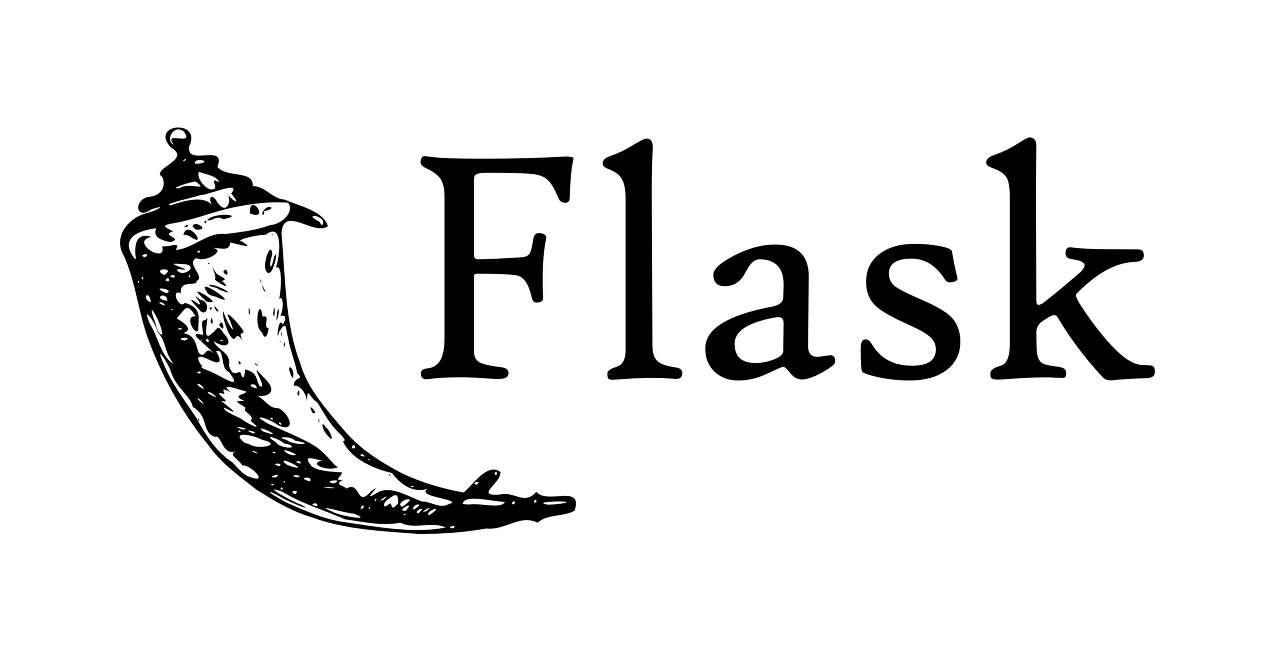

## Step1. 웹사이트에 사용될 inference 함수를 만듭니다

In [ ]:
# Q1. 하나의 문장을 입력하면[input] 주제(라벨)을 반환[output]하는 함수 'inference' 를 만들어보세요:

def inference()

### 답

In [ ]:
def inference(text):
  encoding = tokenizer(text, return_tensors = 'pt')
  encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

  outputs = trainer.model(**encoding)

  logits = outputs.logits

  probs = logits.squeeze().cpu()
  predictions = np.where(probs==probs.max(), 1, 0)
  predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]

  return predicted_labels[0]

### 내가 만든 함수 사용

In [ ]:
# Q2. 내가 만든 함수를 사용해보세요:
inference("")

## Step2. 플라스크 라이브러리 및 웹 실행을 위해 필요한 것들을 설치해줍니다.

In [ ]:
!pip install flask --quiet
!pip install flask-ngrok --quiet
print("Completed!")

Completed!


In [ ]:
# install ngrok linux version using the following command or you can get the
# latest version from its official website- https://dashboard.ngrok.com/get-started/setup

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2022-11-11 15:58:49--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.13M  8.21MB/s    in 1.6s    

2022-11-11 15:58:51 (8.21 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13770165/13770165]



In [ ]:
# extract the downloaded file using the following command 

!tar -xvf /content/ngrok-stable-linux-amd64.tgz

ngrok


In [ ]:
# ngrok 사이트 (https://dashboard.ngrok.com/get-started/setup)에서 회원가입을 한뒤
# "Your Authtoken" 탭을 클릭하여 authtoken을 복사하여 붙여넣습니다.

!./ngrok authtoken 2EqCVHJWzAFSanZyoPOwm33UtOP_63psQvbphGye7ekPLqGki

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# import Flask from flask module
from flask import Flask
from flask import render_template, request

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


다음 셀을 실행시킨 후,

세 개의 주소 중 ngrok.io 으로 끝나는 주소를 클릭하여 결과를 확인해보세요!

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def man():
  return """
  <html>
    <body bgcolor=#F5F5DC>

        <center>

        <h1> 내가 만든 모델 인퍼해보기 </h1><br>
        
        <form method="POST", action="/predict">
           <b> 이 문장의 주제는? :  <input type="text", name='a', placeholder="enter 1"> <br><br>
            <input type="submit" , value='predict!' >
        </form>
        
    </center>

    </body>
</html>
"""
    # return render_template('home.html')


@app.route('/predict', methods=['POST'])
def home():
    data1 = request.form['a']
    pred = inference(data1)

    return f"""
    <html>

<body bgcolor=#a3cfb4>

    <center>

        <h1> 입력하신 문장의 주제는 {pred} 입니다. </h1>

    </center>

</body>

</html>"""

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://d15a-34-74-91-100.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [11/Nov/2022 15:59:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2022 15:59:31] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [11/Nov/2022 15:59:37] "POST /predict HTTP/1.1" 200 -
